# Этап 2: Data Understanding

## Датасет №1: Адреса, где установлены камеры уличного видеонаблюдения

###Collect Initial Data
URL: https://data.gov.spb.ru/opendata/7825457753-Addresses_camera_installation/ (Дата обращения 31.05.21)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_cameras = pd.read_csv('CCTV.csv')
df_cameras.head()

,number,district,address,amount
0,1.1,Адмиралтейский,"10-я Красноармейская ул., д.3, к.9",7
1,1.2,Адмиралтейский,"10-я Красноармейская ул., д.8",3
2,1.3,Адмиралтейский,"11-я Красноармейская ул., д.9",3
3,1.4,Адмиралтейский,"12-я Красноармейская ул., д.1/21",1
4,1.5,Адмиралтейский,"13-я Красноармейская ул., д.14",3


###Describe Data


Описание полей:


*   number - номер записи в таблице;
*   district - район Санкт-Петербурга;
*   address - адрес, по которому установлены видеокамеры уличного наблюдения;
*   amount - количество камер, установленных по указанному адресу.

In [ ]:
df_cameras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   number    9140 non-null   float64
 1   district  9140 non-null   object 
 2   address   9140 non-null   object 
 3   amount    9140 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 285.8+ KB


###Explore Data

1. Подсчитаем количество записей по районам.

In [ ]:
df_cameras['district'].value_counts(dropna=False)

Калининский          1146
Центральный           800
Петроградский         789
Приморский            737
Невский               671
Выборгский            670
Московский            616
Фрунзенский           582
Красногвардейский     503
Адмиралтейский        460
Колпинский            379
Василеостровский      357
Красносельский        327
Курортный             306
Кировский             242
Пушкинский            216
Кронштадтский         213
Петродворцовый        115
Курортный               9
Московский              1
Невский                 1
Name: district, dtype: int64

2. Узнаем, сколько всего камер установлено.

In [ ]:
df_cameras['amount'].sum()

39659

3. Подсчитаем количество установленных камер по районам.

In [ ]:
df_cameras.groupby('district')['amount'].agg('sum')

district
Адмиралтейский       1531
Василеостровский      843
Выборгский           3992
Калининский          5853
Кировский            1190
Колпинский           2102
Красногвардейский    2847
Красносельский       1772
Кронштадтский         585
Курортный            1186
Курортный              76
Московский           1598
Московский              1
Невский              3047
Невский                 1
Петроградский        2823
Петродворцовый        903
Приморский           3487
Пушкинский            691
Фрунзенский          3366
Центральный          1765
Name: amount, dtype: int64

###Verify Data Quality

Отсутствующие данные

In [ ]:
for col in df_cameras.columns:
    pct_missing = np.mean(df_cameras[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

number - 0%
district - 0%
address - 0%
amount - 0%


Нетипичные данные (выбросы)

In [ ]:
df_cameras['amount'].describe()

count    9140.000000
mean        4.339059
std         4.104263
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        60.000000
Name: amount, dtype: float64

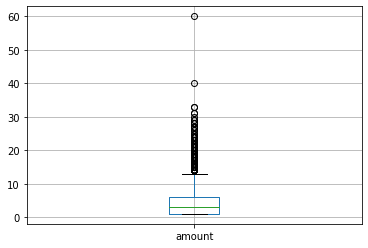

In [ ]:
df_cameras.boxplot(column=['amount'])

In [ ]:
df_cameras['amount'].value_counts(sort=True)

1     2459
2     1417
4     1057
3     1049
5      714
6      689
7      356
9      280
8      280
10     152
12     127
11     108
13      85
14      68
16      52
15      41
17      39
18      38
20      27
22      22
21      17
19      15
24      12
23      10
27       6
25       4
28       4
26       3
33       2
29       2
31       2
60       1
40       1
30       1
Name: amount, dtype: int64

Дубликаты записей

In [ ]:
# отбрасываем неуникальные строки
df_cam_dedupped = df_cameras.drop('amount', axis=1).drop_duplicates()

# сравниваем формы старого и нового наборов
print(df_cameras.shape)
print(df_cam_dedupped.shape)

(9140, 4)
(9140, 3)


Дубликатов нет.

Вывод: в датасете с адресами камер есть выброс в колонке 'amount'.

## Датасет №2: Объекты недвижимого фонда, находящиеся в собственности Санкт-Петербурга, предназначенные для предоставления субъектам малого и среднего предпринимательства в Санкт-Петербурге

###Collect Initial Data
URL: https://data.gov.spb.ru/opendata/7832000076-support_business/ (Дата обращения 31.05.21)

In [ ]:
df_business = pd.read_csv('business_support.csv')
df_business.head()

,district,address,type,cadastral_number,area,status,document,obj_id
0,Калининский,"195009, г.Санкт-Петербург, улица Комсомола, д....",помещение,78:10:5106:0:6:2,262.7,исключен,111-р от 24.08.2010,400019652
1,Центральный,"191104, г.Санкт-Петербург, улица Жуковского, д...",часть помещения,78:1219:2006:49:2,108.2,включен,237-р от 26.12.2008,300013581
2,Центральный,"191025, г.Санкт-Петербург, улица Маяковского, ...",помещение,78:1219:4:9:3,100.8,исключен,911-рк от 28.11.2016,300007945
3,Центральный,"191025, г.Санкт-Петербург, улица Маяковского, ...",помещение,78:31:0001219:3931,101.6,включен,237-р от 26.12.2008,300001882
4,Центральный,"191123, г.Санкт-Петербург, Кирочная улица, д. ...",помещение,78:1276:2001:26:2,319.2,исключен,29-р от 23.03.2010,300017588


###Describe Data


Описание полей:


*   district - район Санкт-Петербурга;
*   address - адрес объекта недвижимого фонда;
*   type - тип помещения;
*   cadastral_number - кадастровый номер;
*   area - площадь помещения;
*   status - статус;
*   document - распоряжение комитета по управлению городским имуществом;
*   obj_id - идентификатор объекта недвижимого фонда.



In [ ]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          2655 non-null   object 
 1   address           2655 non-null   object 
 2   type              2655 non-null   object 
 3   cadastral_number  2629 non-null   object 
 4   area              2655 non-null   float64
 5   status            2655 non-null   object 
 6   document          2655 non-null   object 
 7   obj_id            2655 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 166.1+ KB


###Explore Data

1. Подсчитаем количество записей по районам.

In [ ]:
df_business['district'].value_counts(dropna=False)[:5]

Центральный       1028
Адмиралтейский     427
Петроградский      244
Невский            169
Московский         152
Name: district, dtype: int64

2. Подсчитаем общую площадь объектов недвижимого фонда по районам.

In [ ]:
df_business.groupby('district')['area'].agg('sum')

district
Адмиралтейский        60829.9
Василеостровский      13297.6
Выборгский             7831.8
Калининский            5646.2
Кировский             13092.8
Колпинский             2521.1
Красногвардейский     17005.4
Красносельский         5147.3
Кронштадтский           789.6
Курортный              2333.6
Московский            19932.2
Невский               28798.0
Петроградский         30228.0
Петродворцовый         4846.8
Приморский             3060.0
Пушкинский             5352.5
Фрунзенский           12938.3
Центральный          164305.5
Name: area, dtype: float64

3. Узнаем, какие есть типы помещений, как они распределены по районам города.

In [ ]:
df_business['type'].unique()

array(['помещение', 'часть помещения', 'здание', 'часть здания'],
      dtype=object)

In [ ]:
df_business.groupby('district')['type'].describe()

,count,unique,top,freq
district,,,,
Адмиралтейский,427,3,помещение,326
Василеостровский,92,4,помещение,60
Выборгский,59,3,помещение,33
Калининский,41,3,помещение,30
Кировский,106,4,помещение,60
Колпинский,16,2,здание,9
Красногвардейский,99,4,помещение,52
Красносельский,38,3,помещение,31
Кронштадтский,5,3,здание,2


###Verify Data Quality

Отсутствующие данные

In [ ]:
for col in df_business.columns:
    pct_missing = np.mean(df_business[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

district - 0%
address - 0%
type - 0%
cadastral_number - 1%
area - 0%
status - 0%
document - 0%
obj_id - 0%


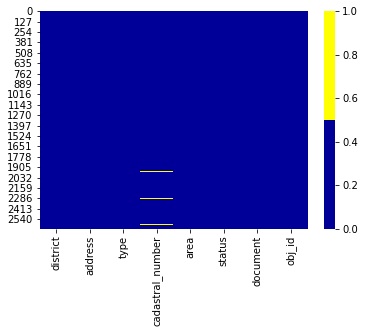

In [ ]:
import seaborn as sns

colours = ['#000099', '#ffff00'] 
sns.heatmap(df_business.isnull(), cmap=sns.color_palette(colours))

Видим, что у нас не везде указан кадастровый номер помещения (cadastral number). Определим, какой метод борьбы с пропусками лучше всего подходит в данной ситуации. Отбрасывать сам признак не имеет смысла, так как процент пропусков очень мал. Внесение недостающих значений не представляется возможным, так как cadastral number - это уникальный номер объекта недвижимости. Наиболее простым способом решения проблемы является отбрасывание записей, содержащих пропуски. Тем не менее, возможна замена надостающих значений на некоторый дефолтный плейсхолдер, в таком случае мы не потеряем важной информации.

Нетипичные данные (выбросы)

In [ ]:
df_business['area'].describe()

count    2655.000000
mean      149.889492
std       181.486754
min         2.300000
25%        53.100000
50%       101.500000
75%       191.450000
max      3458.300000
Name: area, dtype: float64

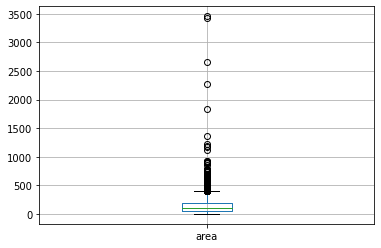

In [ ]:
df_business.boxplot(column=['area'])

Дубликаты записей

In [ ]:
# отбрасываем неуникальные строки
df_bus_dedupped = df_business.drop('obj_id', axis=1).drop_duplicates()

# сравниваем формы старого и нового наборов
print(df_business.shape)
print(df_bus_dedupped.shape)

(2655, 8)
(2653, 7)


In [ ]:
key = ['district', 'address', 'type', 'cadastral_number', 'area', 'status', 'document']

df_business.fillna(-999).groupby(key)['obj_id'].count().sort_values(ascending=False).head(20)

district        address                                                                                  type             cadastral_number    area   status    document                 
Адмиралтейский  190031, г.Санкт-Петербург, Спасский переулок, д. 4, литера Б                             часть помещения  78:1145:0:30:2      23.1   включен   237-р от 26.12.2008          2
Невский         192174, г.Санкт-Петербург, проспект Александровской Фермы, д. 66а, литера А              часть здания     78:7152:2006:244    133.5  исключен  132-р от 04.10.2010          2
Кронштадтский   197760, Санкт-Петербург, город Кронштадт, улица Восстания, д. 11, литера А               здание           78:34:10358:2:15    195.1  исключен  77-р от 05.06.2012           1
Курортный       197733, Санкт-Петербург, поселок Комарово, Большой проспект, д. 13, литера Б             здание           78:22218:0:10       42.3   исключен  54-р от 11.05.2011           1
                197720, Санкт-Петербург, город Зеленого

In [ ]:
df_business[df_business['address'] == '190031, г.Санкт-Петербург, Спасский переулок, д. 4, литера Б']

,district,address,type,cadastral_number,area,status,document,obj_id
775,Адмиралтейский,"190031, г.Санкт-Петербург, Спасский переулок, ...",часть помещения,78:1145:0:30:2,23.1,включен,237-р от 26.12.2008,1100043291
1113,Адмиралтейский,"190031, г.Санкт-Петербург, Спасский переулок, ...",часть помещения,78:1145:0:30:2,23.1,включен,237-р от 26.12.2008,1100043290
1781,Адмиралтейский,"190031, г.Санкт-Петербург, Спасский переулок, ...",часть помещения,78:1145:0:30:5,56.7,включен,237-р от 26.12.2008,1100043208
2105,Адмиралтейский,"190031, г.Санкт-Петербург, Спасский переулок, ...",часть помещения,78:1145:0:30:5,54.4,включен,237-р от 26.12.2008,1100043207


In [ ]:
df_business[df_business['address'] == '192174, г.Санкт-Петербург, проспект Александровской Фермы, д. 66а, литера А']

,district,address,type,cadastral_number,area,status,document,obj_id
136,Невский,"192174, г.Санкт-Петербург, проспект Александро...",часть здания,78:7152:2006:244,133.5,исключен,132-р от 04.10.2010,1300032196
462,Невский,"192174, г.Санкт-Петербург, проспект Александро...",часть здания,78:7152:2006:244,133.5,исключен,132-р от 04.10.2010,1300032197
1115,Невский,"192174, г.Санкт-Петербург, проспект Александро...",часть здания,78:7152:2006:244,130.7,исключен,132-р от 04.10.2010,1300032198


Найдены два дубликата.

#Этап 3: Data Preparation

## Датасет №1

###Select Data
Признак 'number' не является релевантным, исключим его.

In [ ]:
df_cameras.drop('number', axis=1, inplace=True)
df_cameras.head()

,district,address,amount
0,Адмиралтейский,"10-я Красноармейская ул., д.3, к.9",7
1,Адмиралтейский,"10-я Красноармейская ул., д.8",3
2,Адмиралтейский,"11-я Красноармейская ул., д.9",3
3,Адмиралтейский,"12-я Красноармейская ул., д.1/21",1
4,Адмиралтейский,"13-я Красноармейская ул., д.14",3


###Clean Data

Удалим выбросы

In [ ]:
df_cameras = df_cameras[df_cameras.amount != 60]

###Construct Data & Format Data
Требуется взять колонку 'address' и разделить ее, создав новые колонки 'city', 'street', 'house'. Приведем все адреса к нижнему регистру.

In [ ]:
df_cameras['address'] = df_cameras['address'].str.lower()

Унифицируем обозначения в адресах.

In [ ]:
df_cameras['address'] = df_cameras['address'].replace({'ул. д.' : 'ул., д.'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'пр. д.' : 'пр., д.'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'пер. д.' : 'пер., д.'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'пр-д' : 'проезд'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'бул\.' : 'бульвар'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'ул\.' : 'улица'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'пр\.' : 'проспект'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'пл\.' : 'площадь'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'наб\.' : 'набережная'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'кан\.' : 'канала'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'ш\.' : 'шоссе'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'пер\.' : 'переулок'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'дор\.' : 'дорога'}, regex=True)
df_cameras['address'] = df_cameras['address'].replace({'алл\.' : 'аллея'}, regex=True)

Удалим лишние адреса.

In [ ]:
street_pattern = r'улица|проспект|переулок|шоссе|площадь|набережная|бульвар|аллея|линия|дорога'

df_filtered_cameras = df_cameras[df_cameras['address'].str.contains(street_pattern, na=False)]

In [ ]:
df_filtered_cameras

,district,address,amount
0,Адмиралтейский,"10-я красноармейская улица, д.3, к.9",7
1,Адмиралтейский,"10-я красноармейская улица, д.8",3
2,Адмиралтейский,"11-я красноармейская улица, д.9",3
3,Адмиралтейский,"12-я красноармейская улица, д.1/21",1
4,Адмиралтейский,"13-я красноармейская улица, д.14",3
...,...,...,...
9134,Центральный,"шпалерная улица, д.60",1
9135,Центральный,"шпалерная улица, д.8",2
9136,Центральный,"шпалерная улица, д.54",1
9137,Центральный,"щербаков переулок, д.1",3


Разделим адрес на части и заполним таблицу (с использованием регулярных выражений)

In [ ]:
import re

district_arr =[]
street_arr = []
street_pattern = r'улица|проспект|переулок|шоссе|площадь|набережная|бульвар|аллея|линия|дорога'
house_arr = []
house_pattern = r'д\.'
amount_arr =[]


for adress in df_filtered_cameras['address']:
  coma_split_adress = adress.split(",")
  new_street = "-"
  new_house = '-'

  for part in coma_split_adress:
    if re.search(street_pattern, part):
        new_street = part

    if re.search(house_pattern, part):
        new_house = part

  if new_street == "-":
    print(adress)

  street_arr.append(new_street.strip(' '))
  house_arr.append(new_house.strip(' '))

for district in df_filtered_cameras['district']:
    district_arr.append(district.strip(' '))

for amount in df_filtered_cameras['amount']:
    amount_arr.append(amount)

df_cameras_adress = pd.DataFrame({
    'city': 'санкт-петербург',
    'district': district_arr,
    'street': street_arr,
    'house': house_arr,
    'amount': amount_arr,
    })

df_cameras_adress['house'] = df_cameras_adress['house'].replace({'д.' : ''}, regex=True)
df_cameras_adress['house'] = df_cameras_adress['house'].replace({' ' : ''}, regex=True)
df_cameras_adress['street'] = df_cameras_adress['street'].replace({' р. ' : ' реки '}, regex=True)

In [ ]:
df_cameras_adress

,city,district,street,house,amount
0,санкт-петербург,Адмиралтейский,10-я красноармейская улица,3,7
1,санкт-петербург,Адмиралтейский,10-я красноармейская улица,8,3
2,санкт-петербург,Адмиралтейский,11-я красноармейская улица,9,3
3,санкт-петербург,Адмиралтейский,12-я красноармейская улица,1/21,1
4,санкт-петербург,Адмиралтейский,13-я красноармейская улица,14,3
...,...,...,...,...,...
9009,санкт-петербург,Центральный,шпалерная улица,60,1
9010,санкт-петербург,Центральный,шпалерная улица,8,2
9011,санкт-петербург,Центральный,шпалерная улица,54,1
9012,санкт-петербург,Центральный,щербаков переулок,1,3


Переместим наименования адресных объектов в столбце 'street' в начало строки.

In [ ]:
df_cameras_adress['clean_street']  = np.nan
street_words = [' в.о.',' п.с.','улица','проспект','переулок','шоссе','площадь','реки ','канала','набережная','бульвар','аллея','линия','дорога']
for row, addr in enumerate(df_cameras_adress['street']):
  for i in range(len(street_words)):
    if street_words[i] in addr:
      addr = addr.replace(street_words[i], '')
      addr = addr.strip()
      addr = street_words[i].strip() + ' ' + addr
      df_cameras_adress['clean_street'][row] = addr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_cameras_adress.head()

,city,district,street,house,amount,clean_street
0,санкт-петербург,Адмиралтейский,10-я красноармейская улица,3,7,улица 10-я красноармейская
1,санкт-петербург,Адмиралтейский,10-я красноармейская улица,8,3,улица 10-я красноармейская
2,санкт-петербург,Адмиралтейский,11-я красноармейская улица,9,3,улица 11-я красноармейская
3,санкт-петербург,Адмиралтейский,12-я красноармейская улица,1/21,1,улица 12-я красноармейская
4,санкт-петербург,Адмиралтейский,13-я красноармейская улица,14,3,улица 13-я красноармейская


In [ ]:
df_cameras_adress.dropna() 
df_cameras_adress.drop('street', axis=1, inplace=True)
#df_cameras_adress.rename(columns={'street': 'dirty_street'}, inplace=True)
df_cameras_adress.rename(columns={'clean_street': 'street'}, inplace=True)
df_cameras_adress.head()

,city,district,house,amount,street
0,санкт-петербург,Адмиралтейский,3,7,улица 10-я красноармейская
1,санкт-петербург,Адмиралтейский,8,3,улица 10-я красноармейская
2,санкт-петербург,Адмиралтейский,9,3,улица 11-я красноармейская
3,санкт-петербург,Адмиралтейский,1/21,1,улица 12-я красноармейская
4,санкт-петербург,Адмиралтейский,14,3,улица 13-я красноармейская


## Датасет №2

###Select Data

In [ ]:
df_business.drop(['document', 'status', 'cadastral_number', 'obj_id'], axis=1, inplace=True)
df_business.head()

,district,address,type,area
0,Калининский,"195009, г.Санкт-Петербург, улица Комсомола, д....",помещение,262.7
1,Центральный,"191104, г.Санкт-Петербург, улица Жуковского, д...",часть помещения,108.2
2,Центральный,"191025, г.Санкт-Петербург, улица Маяковского, ...",помещение,100.8
3,Центральный,"191025, г.Санкт-Петербург, улица Маяковского, ...",помещение,101.6
4,Центральный,"191123, г.Санкт-Петербург, Кирочная улица, д. ...",помещение,319.2


###Clean Data

Удаляем дубликаты.

In [ ]:
key = ['district', 'address', 'type', 'area']
df_business = df_business.drop_duplicates(subset=key)

###Construct Data & Format Data
Требуется взять колонку 'address' и разделить ее, создав новые колонки 'city', 'street', 'house'. Приведем все адреса к нижнему регистру.

In [ ]:
df_business['address'] = df_business['address'].str.lower()

Разделим адрес на части и заполним таблицу (с использованием регулярных выражений)

In [ ]:
district_arr = []
street_arr = []
street_pattern = r'улица|проспект|переулок|шоссе|площадь|набережная|бульвар|аллея|линия|дорога'
city_arr = []
city_pattern = r'санкт-петербург$'
index_arr = []
index_pattern = r'[0-9]{5}'
house_arr = []
house_pattern = r'д\.'
type_arr = []
area_arr = []

for adress in df_business['address']:
  coma_split_adress = adress.split(",")
  new_street = "-"
  new_city = "-"
  new_index = "-"
  new_house = '-'

  for part in coma_split_adress:
    if re.search(index_pattern, part):
      new_index = part
    
    if re.search(street_pattern, part):
      new_street = part

    if re.search(city_pattern, part):
      new_city = part

    if re.search(house_pattern, part):
      new_house = part

  street_arr.append(new_street.strip(' '))
  city_arr.append(new_city.strip(' '))
  index_arr.append(new_index.strip(' '))
  house_arr.append(new_house.strip(' '))

for district in df_business['district']:
    district_arr.append(district.strip(' '))

for atype in df_business['type']:
    type_arr.append(atype.strip(' '))

for area in df_business['area']:
    area_arr.append(area)

df_business_adress = pd.DataFrame({
    'index': index_arr,
    'city': city_arr,
    'district': district_arr,
    'street': street_arr,
    'house': house_arr,
    'type': type_arr,
    'area': area_arr,
    })

df_business_adress['house'] = df_business_adress['house'].replace({'д.' : ''}, regex=True)
df_business_adress['house'] = df_business_adress['house'].replace({' ' : ''}, regex=True)
df_business_adress['city'] = df_business_adress['city'].replace({'г.' : ''}, regex=True)

In [ ]:
df_business_adress.head()

,index,city,district,street,house,type,area
0,195009,санкт-петербург,Калининский,улица комсомола,33,помещение,262.7
1,191104,санкт-петербург,Центральный,улица жуковского,7-9,часть помещения,108.2
2,191025,санкт-петербург,Центральный,улица маяковского,2/94,помещение,100.8
3,191025,санкт-петербург,Центральный,улица маяковского,4,помещение,101.6
4,191123,санкт-петербург,Центральный,кирочная улица,23,помещение,319.2


Переместим наименования адресных объектов в столбце 'street' в начало строки.

In [ ]:
df_business_adress['clean_street']  = np.nan
street_words = [' в.о.',' п.с.','улица','проспект','переулок','шоссе','площадь',' канала','набережная ','бульвар','аллея','линия','дорога']
for row, addr in enumerate(df_business_adress['street']):
  for i in range(len(street_words)):
    if street_words[i] in addr:
      addr = addr.replace(street_words[i], '')
      addr = addr.strip()
      addr = street_words[i].strip() + ' ' + addr
      df_business_adress['clean_street'][row] = addr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_business_adress.head()

,index,city,district,street,house,type,area,clean_street
0,195009,санкт-петербург,Калининский,улица комсомола,33,помещение,262.7,улица комсомола
1,191104,санкт-петербург,Центральный,улица жуковского,7-9,часть помещения,108.2,улица жуковского
2,191025,санкт-петербург,Центральный,улица маяковского,2/94,помещение,100.8,улица маяковского
3,191025,санкт-петербург,Центральный,улица маяковского,4,помещение,101.6,улица маяковского
4,191123,санкт-петербург,Центральный,кирочная улица,23,помещение,319.2,улица кирочная


In [ ]:
df_business_adress.dropna() 
df_business_adress.drop('street', axis=1, inplace=True)
#df_business_adress.rename(columns={'street': 'dirty_street'}, inplace=True)
df_business_adress.rename(columns={'clean_street': 'street'}, inplace=True)
df_business_adress.head()

,index,city,district,house,type,area,street
0,195009,санкт-петербург,Калининский,33,помещение,262.7,улица комсомола
1,191104,санкт-петербург,Центральный,7-9,часть помещения,108.2,улица жуковского
2,191025,санкт-петербург,Центральный,2/94,помещение,100.8,улица маяковского
3,191025,санкт-петербург,Центральный,4,помещение,101.6,улица маяковского
4,191123,санкт-петербург,Центральный,23,помещение,319.2,улица кирочная


##Integrate Data

In [ ]:
df_business_adress['index_col'] = df_business_adress.index
df_business_adress.head()

,index,city,district,house,type,area,street,index_col
0,195009,санкт-петербург,Калининский,33,помещение,262.7,улица комсомола,0
1,191104,санкт-петербург,Центральный,7-9,часть помещения,108.2,улица жуковского,1
2,191025,санкт-петербург,Центральный,2/94,помещение,100.8,улица маяковского,2
3,191025,санкт-петербург,Центральный,4,помещение,101.6,улица маяковского,3
4,191123,санкт-петербург,Центральный,23,помещение,319.2,улица кирочная,4


In [ ]:
training_data = df_cameras_adress.merge(df_business_adress, on=['street', 'house'])
training_data.head()

,city_x,district_x,house,amount,street,index,city_y,district_y,type,area,index_col
0,санкт-петербург,Адмиралтейский,7,2,набережная канала адмиралтейского,190000,санкт-петербург,Адмиралтейский,помещение,143.2,1243
1,санкт-петербург,Адмиралтейский,40,4,проспект английский,190068,санкт-петербург,Адмиралтейский,помещение,335.3,2348
2,санкт-петербург,Адмиралтейский,11,2,улица большая морская,191186,санкт-петербург,Центральный,помещение,216.5,1724
3,санкт-петербург,Адмиралтейский,40,1,улица большая морская,190000,санкт-петербург,Адмиралтейский,помещение,3420.9,784
4,санкт-петербург,Адмиралтейский,1/61,3,переулок большой казачий,191180,санкт-петербург,Адмиралтейский,помещение,266.8,820


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city_x      1050 non-null   object 
 1   district_x  1050 non-null   object 
 2   house       1050 non-null   object 
 3   amount      1050 non-null   int64  
 4   street      1050 non-null   object 
 5   index       1050 non-null   object 
 6   city_y      1050 non-null   object 
 7   district_y  1050 non-null   object 
 8   type        1050 non-null   object 
 9   area        1050 non-null   float64
 10  index_col   1050 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 98.4+ KB


In [ ]:
training_data = training_data[training_data['district_x'] == training_data['district_y']]
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city_x      1029 non-null   object 
 1   district_x  1029 non-null   object 
 2   house       1029 non-null   object 
 3   amount      1029 non-null   int64  
 4   street      1029 non-null   object 
 5   index       1029 non-null   object 
 6   city_y      1029 non-null   object 
 7   district_y  1029 non-null   object 
 8   type        1029 non-null   object 
 9   area        1029 non-null   float64
 10  index_col   1029 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 96.5+ KB


In [ ]:
training_data.drop(['city_y', 'district_y'], axis=1, inplace=True)
training_data.rename(columns={'city_x': 'city', 'district_x': 'district'}, inplace=True)
training_data = training_data[['index_col','district','index','city','street','house','type','area','amount']]
training_data.head()

,index_col,district,index,city,street,house,type,area,amount
0,1243,Адмиралтейский,190000,санкт-петербург,набережная канала адмиралтейского,7,помещение,143.2,2
1,2348,Адмиралтейский,190068,санкт-петербург,проспект английский,40,помещение,335.3,4
3,784,Адмиралтейский,190000,санкт-петербург,улица большая морская,40,помещение,3420.9,1
4,820,Адмиралтейский,191180,санкт-петербург,переулок большой казачий,1/61,помещение,266.8,3
5,821,Адмиралтейский,191180,санкт-петербург,переулок большой казачий,1/61,помещение,204.3,3


In [ ]:
predict_data = df_business_adress[~df_business_adress.index.isin(training_data.index)]
predict_data = predict_data[['index_col','district','index','city','street','house','type','area']]
predict_data.head()

,index_col,district,index,city,street,house,type,area
2,2,Центральный,191025,санкт-петербург,улица маяковского,2/94,помещение,100.8
277,277,Невский,192029,санкт-петербург,улица седова,37,помещение,86.7
345,345,Петроградский,197198,санкт-петербург,улица зверинская,18,помещение,39.0
348,348,Петроградский,197198,санкт-петербург,улица шамшева,5/50,помещение,94.8
349,349,Петроградский,197110,санкт-петербург,улица большая зеленина,22,помещение,44.6


In [ ]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 2 to 2646
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index_col  1618 non-null   int64  
 1   district   1618 non-null   object 
 2   index      1618 non-null   object 
 3   city       1618 non-null   object 
 4   street     1612 non-null   object 
 5   house      1618 non-null   object 
 6   type       1618 non-null   object 
 7   area       1618 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 113.8+ KB


In [ ]:
training_data.drop(['index_col'], axis=1, inplace=True)

In [ ]:
predict_data.drop(['index_col'], axis=1, inplace=True)

In [ ]:
training_data.head()

,district,index,city,street,house,type,area,amount
0,Адмиралтейский,190000,санкт-петербург,набережная канала адмиралтейского,7,помещение,143.2,2
1,Адмиралтейский,190068,санкт-петербург,проспект английский,40,помещение,335.3,4
3,Адмиралтейский,190000,санкт-петербург,улица большая морская,40,помещение,3420.9,1
4,Адмиралтейский,191180,санкт-петербург,переулок большой казачий,1/61,помещение,266.8,3
5,Адмиралтейский,191180,санкт-петербург,переулок большой казачий,1/61,помещение,204.3,3


In [ ]:
predict_data.head()

,district,index,city,street,house,type,area
2,Центральный,191025,санкт-петербург,улица маяковского,2/94,помещение,100.8
277,Невский,192029,санкт-петербург,улица седова,37,помещение,86.7
345,Петроградский,197198,санкт-петербург,улица зверинская,18,помещение,39.0
348,Петроградский,197198,санкт-петербург,улица шамшева,5/50,помещение,94.8
349,Петроградский,197110,санкт-петербург,улица большая зеленина,22,помещение,44.6


In [ ]:
training_data.to_csv('training_data.csv', index = False, header=True)

In [ ]:
predict_data.to_csv('predict_data.csv', index = False, header=True)